In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

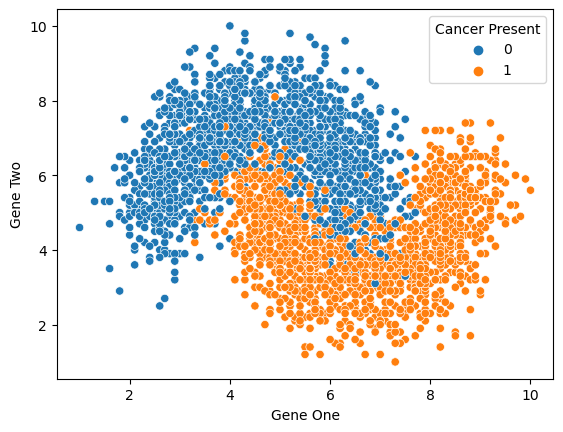

In [4]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)

In [5]:
x=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [6]:
x.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Cancer Present, dtype: int64

# KNN

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [9]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=KNeighborsClassifier()
model.fit(x_train,y_train)
    
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

model.score(x_test,y_test)
scores=cross_val_score(model,x,y,cv=5)
scores.mean()

0.9266666666666665

In [10]:
model.score(x_test,y_test)

0.9322222222222222

In [11]:
model.score(x_train,y_train)

0.9433333333333334

### Hyper Parameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,31)),'p':[1,2]}

cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 15, 'p': 2}

In [13]:
scores=cross_val_score(model,x,y,cv=5)
scores.mean()

0.9266666666666665

In [14]:
model.score(x_test,y_test)

0.9322222222222222

In [15]:
model_1=KNeighborsClassifier(n_neighbors=15,p=2)
model_1.fit(x_train,y_train)
    
train_pred=model_1.predict(x_train)
test_pred=model_1.predict(x_test)

model_1.score(x_test,y_test)
scores=cross_val_score(model_1,x,y,cv=5)
scores.mean()

0.9333333333333333

In [16]:
print('Train accuracy:',model_1.score(x_train,y_train))
print('Test accuracy:',model_1.score(x_test,y_test))
model_1.score(x_test,y_test)
scores=cross_val_score(model_1,x,y,cv=5)
scores.mean()


Train accuracy: 0.9304761904761905
Test accuracy: 0.94


0.9333333333333333

| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 0.930       |       0.94 |   0.933   |

# SVM 

In [17]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [18]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [19]:
print('Train accuracy :', model.score(x_train,y_train))
print('Test accuracy :',model.score(x_test,y_test))

Train accuracy : 0.93
Test accuracy : 0.9477777777777778


In [20]:
scores=cross_val_score(model_1,x,y,cv=5)
scores.mean()

0.9333333333333333

| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 0.930       |       0.94 |   0.933   |
| SVM                  | 0.93        |      0.9477|  0.933    | 

# DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier()
dt_default.fit(x_train,y_train)


pred_train = dt_default.predict(x_train)
base_pred = dt_default.predict(x_test)


from sklearn.metrics import accuracy_score
print('Train accuracy:',accuracy_score(pred_train,y_train))
print('Test_accuracy:',accuracy_score(base_pred,y_test))

from sklearn.model_selection import cross_val_score

scores= cross_val_score(dt_default,x,y,cv=5)
print('cross validation score:',scores.mean())

Train accuracy: 0.9785714285714285
Test_accuracy: 0.8988888888888888
cross validation score: 0.9043333333333333


### Hyper Parameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=0)

param_grid={'criterion':['gini','entropy'],
           'max_depth':[1,2,3,4]}

grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
dt_hp=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt_hp.fit(x_train,y_train)

train_pred=dt_hp.predict(x_train)

test_pred=dt_hp.predict(x_test)

print('Train accuracy :',dt_hp.score(x_train,y_train))
print('Test accuracy :', dt_hp.score(x_test,y_test))
scores= cross_val_score(dt_hp,x,y,cv=5)
print('cross validation score:',scores.mean())

Train accuracy : 0.9014285714285715
Test accuracy : 0.9011111111111111
cross validation score: 0.8939999999999999


| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 0.930       |       0.94 |   0.933   |
| SVM                  | 0.93        |      0.9477|  0.933    | 
| DECISION TREE        | 0.901       |      0.901 |    0.89   |

# LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [30]:
train_pred=LR_model.predict(x_train)
test_pred=LR_model.predict(x_test)

In [31]:
print('Train accuracy:',LR_model.score(x_train,y_train))
print('Test accuracy:',LR_model.score(x_test,y_test))


from sklearn.model_selection import cross_val_score
scores=cross_val_score(LR_model,x,y,cv=5)
print('Cv score:',scores.mean())

Train accuracy: 0.8533333333333334
Test accuracy: 0.8633333333333333
Cv score: 0.8566666666666667


| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 0.930       |       0.94 |   0.933   |
| SVM                  | 0.93        |      0.9477|  0.933    | 
| DECISION TREE        | 0.901       |      0.901 |    0.89   |
| LOGISTIC REGRESSION  | 0.85        |      0.86 |    0.856   |

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


from sklearn.ensemble import RandomForestClassifier
rf_default=RandomForestClassifier()
rf_default.fit(x_train,y_train)


pred_train = dt_default.predict(x_train)
base_pred = dt_default.predict(x_test)


from sklearn.metrics import accuracy_score
print('Train accuracy:',accuracy_score(pred_train,y_train))
print('Test_accuracy:',accuracy_score(base_pred,y_test))

from sklearn.model_selection import cross_val_score

scores= cross_val_score(dt_default,x,y,cv=5)
print('cross validation score:',scores.mean())

Train accuracy: 0.96875
Test_accuracy: 0.8983333333333333
cross validation score: 0.9036666666666665


| MODEL                | Train Score | Test Score | CV  Score |
| ---------------------| ------------| -----------|-----------|
| KNN                  | 0.930       |       0.94 |   0.933   |
| SVM                  | 0.93        |      0.9477|  0.933    | 
| DECISION TREE        | 0.901       |      0.901 |    0.89   |
| LOGISTIC REGRESSION  | 0.85        |      0.86 |    0.856   |
| RANDOM FOREST        | 0.96        |      0.89 |    0.90    |

# BEST MODEL = KNN MODEL